In [1]:
#!pip install tweepy

In [8]:
#!pip install vaderSentiment

In [3]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [5]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
# User Accounts
news_orgs = ['BBC', 'CNN', 'CBSNews', 'FoxNews', 'nytimes']

In [9]:
#create dataframe with new columns
df_tweets = pd.DataFrame()
df_tweets['ORG'] = ''
df_tweets['TWEET_TEXT'] = ''
df_tweets['TWEET_DATE'] = ''

#make api call. run loop to save dataframe to local, get data from local only
#put the breaks on my loop to keep from too many calls.  Originaly set to 10,000
max_records = -1

i = 0

for org in news_orgs:
    if i > max_records:
        break
    public_tweets = api.user_timeline(org, count=100)
    for tweet in public_tweets:
        df_tweets.loc[i, 'ORG'] = org
        df_tweets.loc[i, 'TWEET_TEXT'] = tweet['text']
        df_tweets.loc[i, 'TWEET_DATE'] = tweet['created_at']
        i = i + 1
    
if len(df_tweets) > 1:
    df_tweets.to_csv('df_tweets.csv', index=False)
        
df_tweets=pd.read_csv('df_tweets.csv')
df_tweets

,ORG,TWEET_TEXT,TWEET_DATE
0,BBC,With Cornish wildlife facing so many threats f...,Sun Nov 15 16:01:00 +0000 2020
1,BBC,RT @bbcasiannetwork: Happy Diwali and Bandi Ch...,Sat Nov 14 19:54:57 +0000 2020
2,BBC,It's the clash of the tennis titans 🎾👊@Andy_Mu...,Fri Nov 13 22:18:26 +0000 2020
3,BBC,RT @BBCRadio2: The official video for this yea...,Fri Nov 13 21:00:12 +0000 2020
4,BBC,Thanks for the exclusive performance for @bbcc...,Fri Nov 13 20:33:26 +0000 2020
...,...,...,...
495,nytimes,Breaking News: Israeli agents shot Al Qaeda’s ...,Sat Nov 14 00:48:02 +0000 2020
496,nytimes,"Stocks climbed to a record, after a rally that...",Sat Nov 14 00:40:03 +0000 2020
497,nytimes,"RT @jacknicas: I wrote about Tommy Heinsohn, t...",Sat Nov 14 00:20:05 +0000 2020
498,nytimes,China’s unusual new coronavirus testing policy...,Sat Nov 14 00:00:11 +0000 2020


In [10]:
#convert dates
df_tweets['TWEET_DATE']=pd.to_datetime(df_tweets['TWEET_DATE']).dt.date
df_tweets.loc[df_tweets['TWEET_DATE'] == pd.to_datetime('2020-11-15')]

,ORG,TWEET_TEXT,TWEET_DATE
0,BBC,With Cornish wildlife facing so many threats f...,2020-11-15
100,CNN,"""I think that his message of, 'Hey... I'm goin...",2020-11-15
101,CNN,An 85-year-old primary school in Shanghai has ...,2020-11-15
102,CNN,"""Once all the ranting and suing is over, Biden...",2020-11-15
103,CNN,How to decline a Thanksgiving invitation due t...,2020-11-15
...,...,...,...
418,nytimes,Despite hundreds of thousands protesting again...,2020-11-15
419,nytimes,It took a century to open. A mosque in Athens ...,2020-11-15
420,nytimes,"Though the future is hazy at best, both owners...",2020-11-15
421,nytimes,What if the room you're escaping is in your sc...,2020-11-15


In [11]:
analyser = SentimentIntensityAnalyzer()
print(analyser.polarity_scores('LOVE'))
print(analyser.polarity_scores('EVIL'))

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6597}


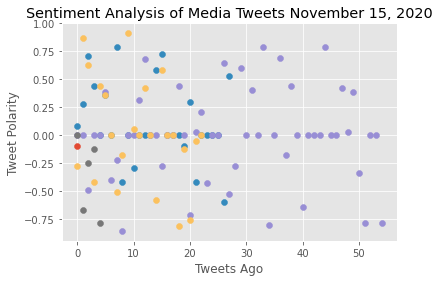

In [14]:
#create plot
df_filtered = df_tweets

for i, row in df_tweets.iterrows():
    dic = analyser.polarity_scores(row['TWEET_TEXT'])
    df_tweets.loc[i, 'Negative'] = dic['neg']
    df_tweets.loc[i, 'Neutral'] = dic['neu']
    df_tweets.loc[i, 'Positive'] = dic['pos']
    df_tweets.loc[i, 'Compound'] = dic['compound']

df_filtered = df_filtered[df_filtered['TWEET_DATE'] == pd.to_datetime('2020-11-15')]
for org in news_orgs:
    df=df_filtered[df_filtered['ORG']==org]
    df=df.sort_values(by='TWEET_DATE', inplace=False)
    plt.scatter( range(len(df)), df['Compound'])
#format plot    
plt.style.use('ggplot')   
plt.title('Sentiment Analysis of Media Tweets November 15, 2020')
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')

#export .png of figure
plt.savefig("Fig1.png")
plt.show()

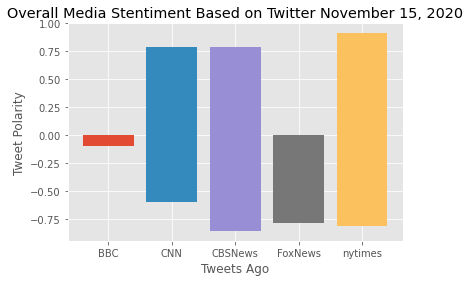

In [15]:
for org in news_orgs:
    df=df_filtered[df_filtered['ORG']==org]
    df=df.sort_values(by='TWEET_DATE', inplace=False)
    plt.bar(df['ORG'], df['Compound'])
#format plot    
plt.style.use('ggplot')   
plt.title('Overall Media Stentiment Based on Twitter November 15, 2020')
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')

#export .png of figure
plt.savefig("Fig2.png")
plt.show()